In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os
import sys

%matplotlib inline

In [2]:
sys.path.append("../")
import plotParameters

In [3]:
refractiveIndices = [
    (2.32542 ,1.84214),
    (1.97009 ,1.85093),
    (1.52958 ,1.86146),
    (1.12864 ,1.87327),
    (1.01398 ,1.87807),
    (0.85211 ,1.88758),
    (0.76819 ,1.89479),
    (0.70652 ,1.90181),
    (0.65627 ,1.90916),
    (0.64385 ,1.91127),
    (0.63280 ,1.91327),
    (0.58929 ,1.92245),
    (0.58756 ,1.92286),
    (0.54607 ,1.93429),
    (0.48613 ,1.95800),
    (0.47999 ,1.96112),
    (0.44157 ,1.98526),
    (0.435835,1.98972),
    (0.404656,2.01976)
]
refractiveIndices = np.array(refractiveIndices)

# Convert wavelengths from air to liquid xenon
refractiveIndices[:, 0] /= 1.69

# Convert wavelengths from um to nm
refractiveIndices[:, 0] *= 1000

refInd(185nm) = 2.102809942396481
Parameters: [ 8.84663463e+01  3.67776321e-04 -1.55087042e-07  1.56188271e+00]


/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_2679/493450925.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_fit.show()


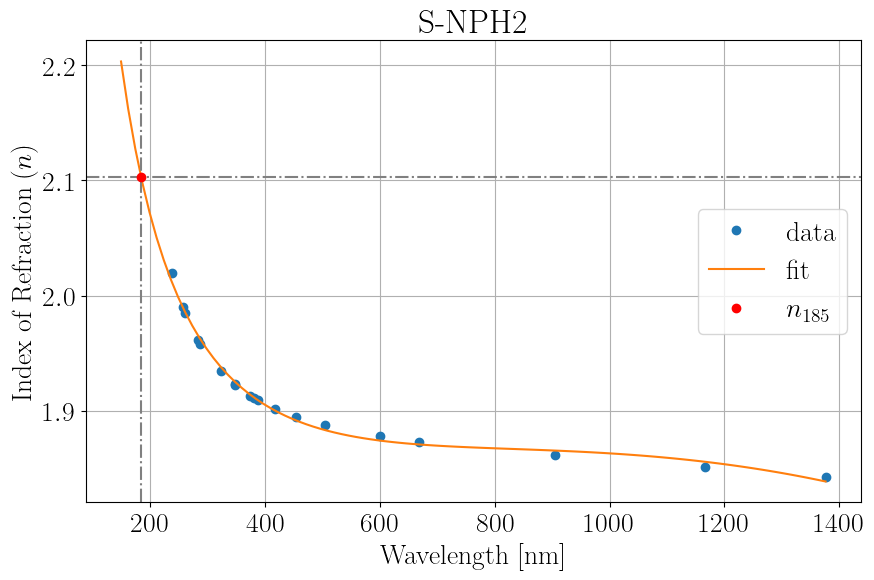

In [5]:
def func(x, a, b, c, d):
    return a * 1/x + b * x + c * x**2 + d

def fit_data(x, y):
    # Define the function to fit the data
    # def func(x, a, b, c):
    #     return a * 1/x + b * x + c
    # def func(x, a, b):
    #     return a * 1/x + b

    # Perform the fit with more points
    x_fit = np.linspace(150, max(x), 100)
    params, _ = opt.curve_fit(func, x, y)
    y_fit = func(x_fit, *params)

    print('refInd(185nm) =', func(185, *params))

    return params, x_fit, y_fit

params, x_fit, y_fit = fit_data(refractiveIndices[:,0], refractiveIndices[:,1])
fig_fit, ax_fit = plt.subplots(figsize=(10, 6))
ax_fit.plot(refractiveIndices[:,0], refractiveIndices[:,1], 'o', label='data')
ax_fit.plot(x_fit, y_fit, '-', label='fit')
ax_fit.axvline(x=185, color='gray', linestyle='-.')
ax_fit.axhline(y=func(185, *params), color='gray', linestyle='-.')
ax_fit.plot(185, func(185, *params), 'ro', label='$n_{185}$')
ax_fit.set_xlabel('Wavelength [nm]')
ax_fit.set_ylabel('Index of Refraction ($n$)')
ax_fit.set_title('S-NPH2')
ax_fit.grid(True)
ax_fit.legend()

fig_fit.savefig('../figures/refractiveIndex.pdf', bbox_inches='tight')
fig_fit.show()

print('Parameters:', params)